In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# 华夫饼图

In [10]:
from pywaffle import Waffle

## demo

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


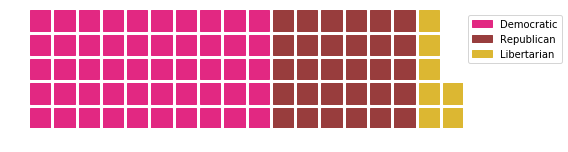

In [14]:
data = {'Democratic': 50, 'Republican':30, "Libertarian":7}
fig = plt.figure(
        figsize=(8,3),
        values=data,
        FigureClass=Waffle,
        rows = 5,
        colors=("#E22882", "#983D3D", "#DCB732"),
        legend = {'loc':'upper left',
                 'bbox_to_anchor':(1,1)
                 }
)

## exercise

In [15]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [35]:
# prepare data
cm_class = plt.cm.Set3
df_class = df_raw.groupby('class').size().reset_index(name='counts')
labels_class = df_class['class'].tolist()
colors_class = [cm_class(float(i/(df_class.shape[0]-1))) 
                for i in range(df_class.shape[0])]


cm_cyl = plt.cm.Spectral
df_cyl = df_raw.groupby('cyl').size().reset_index(name='counts')
labels_cyl = df_cyl['cyl'].tolist()
colors_cyl = [cm_cyl(float(i/(df_cyl.shape[0]-1))) 
                for i in range(df_cyl.shape[0])]

cm_make = plt.cm.tab20b
df_make = df_raw.groupby('manufacturer').size().reset_index(name='counts')
labels_make = df_make['manufacturer'].tolist()
colors_make = [cm_make(float(i/(df_make.shape[0]-1))) 
                for i in range(df_make.shape[0])]

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


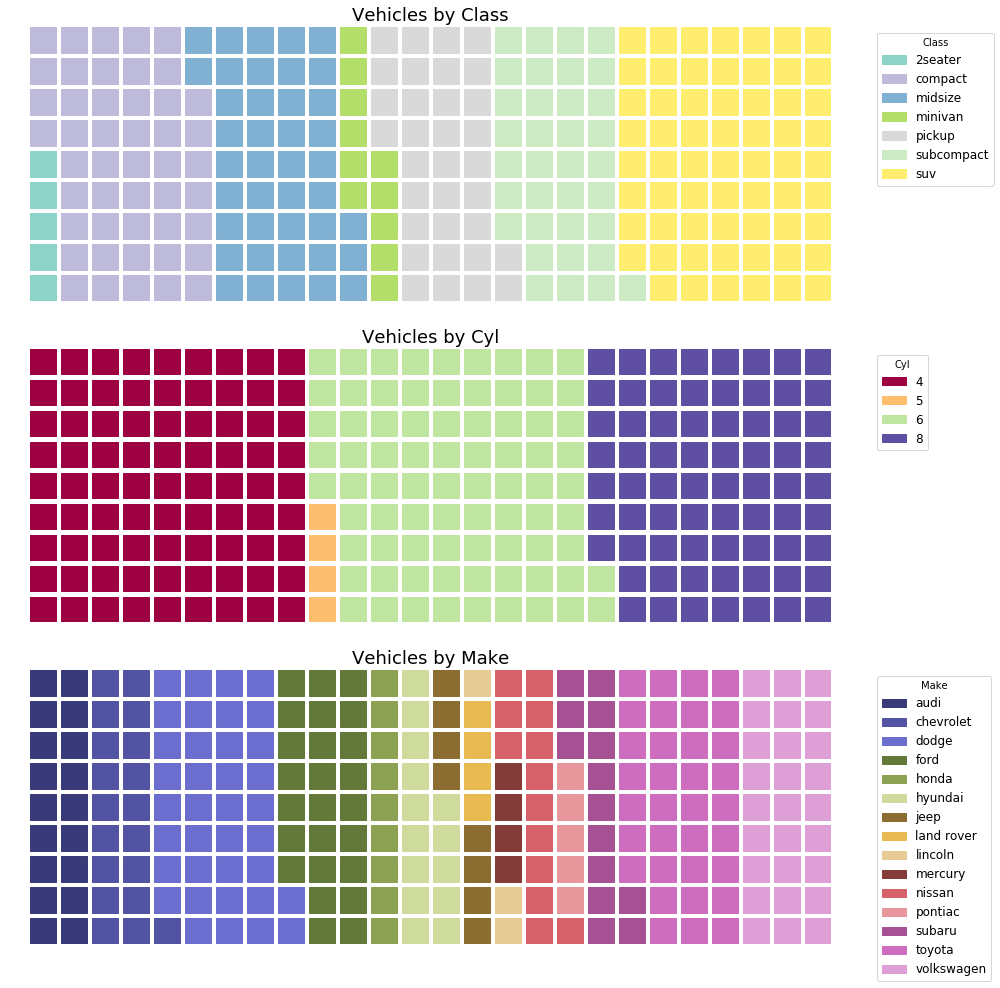

In [45]:
# draw plot and decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={ # 绘制多个图像
        '311': #这里的数字表示，3行，1列，索引为1的图
            {
                'values':df_class['counts'], # 数据集
                'labels':labels_class, # 标签
                'legend':{'loc':'upper left', 'bbox_to_anchor':(1.05,1),
                         'fontsize':12, 'title':'Class'},# legend set
                'title':{'label':'Vehicles by Class', 'fontsize':18,
                        'loc':'center'}, # title set
                'colors':colors_class,
            },
        '312':
            {
                'values':df_cyl['counts'],
                'labels':labels_cyl,
                'legend':{'loc':'upper left', 'bbox_to_anchor':(1.05,1),
                         'fontsize':12, 'title':'Cyl'},
                'title':{'label':'Vehicles by Cyl', 'fontsize':18,
                        'loc':'center'},
                'colors':colors_cyl,
            },
        '313':
            {
                'values':df_make['counts'],
                'labels':labels_make,
                'legend':{'loc':'upper left', 'bbox_to_anchor':(1.05,1),
                         'fontsize':12, 'title':'Make'},
                'title':{'label':'Vehicles by Make', 'fontsize':18,
                        'loc':'center'},
                'colors':colors_make,
            }
    },
    rows=9,
    figsize=(16,14)
)

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


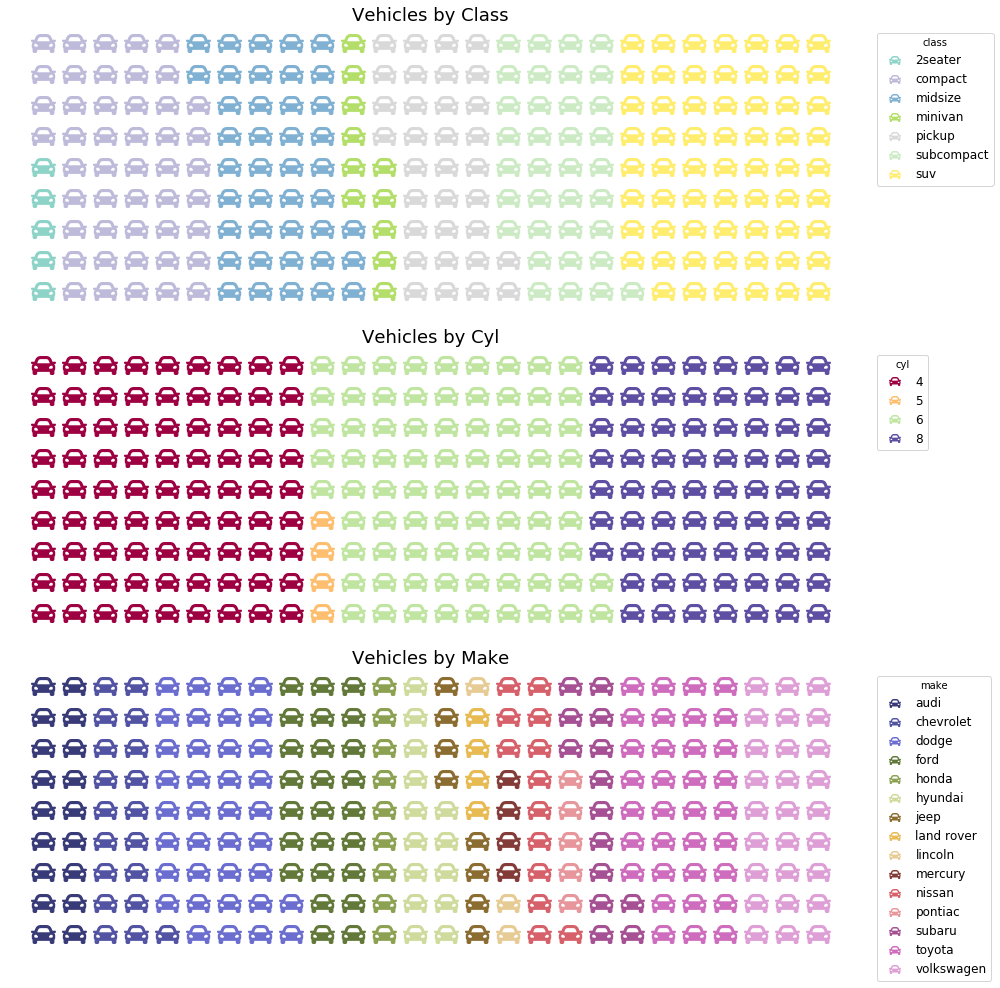

In [44]:
# draw plot and decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={ # 绘制多个图像
        '311': #这里的数字表示，3行，1列，索引为1的图
            {
                'values':df_class['counts'], # 数据集
                'labels':labels_class, # 标签
                'legend':{'loc':'upper left', 'bbox_to_anchor':(1.05,1),
                         'fontsize':12, 'title':'Class'},# legend set
                'title':{'label':'Vehicles by Class', 'fontsize':18,
                        'loc':'center'}, # title set
                'colors':colors_class,
            },
        '312':
            {
                'values':df_cyl['counts'],
                'labels':labels_cyl,
                'legend':{'loc':'upper left', 'bbox_to_anchor':(1.05,1),
                         'fontsize':12, 'title':'Cyl'},
                'title':{'label':'Vehicles by Cyl', 'fontsize':18,
                        'loc':'center'},
                'colors':colors_cyl,
            },
        '313':
            {
                'values':df_make['counts'],
                'labels':labels_make,
                'legend':{'loc':'upper left', 'bbox_to_anchor':(1.05,1),
                         'fontsize':12, 'title':'Make'},
                'title':{'label':'Vehicles by Make', 'fontsize':18,
                        'loc':'center'},
                'colors':colors_make,
            }
    },
    rows=9,
    figsize=(16,14),
    icons='car', # set icon 
    icon_size=25,
    icon_legend=True, 
)

# 饼图

In [46]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [49]:
df = df_raw.groupby('class').size().reset_index(name='counts')

In [50]:
 df

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


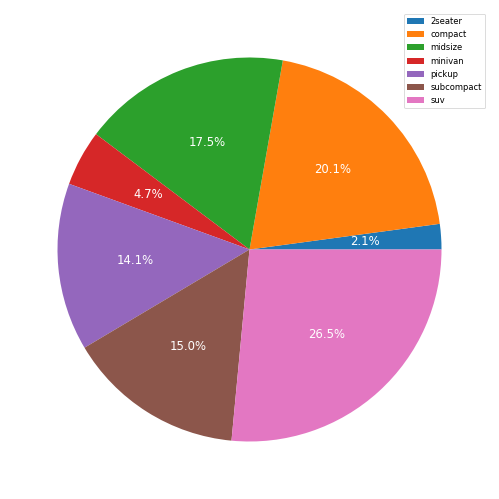

In [68]:
fig = plt.figure(figsize=(8,8),dpi=60)
ax = fig.add_axes((0,0,1,1))

# 在这里匿名函数，接收的x为百分比（小数）
_,_,texts = ax.pie(df.counts, autopct=lambda x: f'{round(x,1)}%')
for text in texts:
    text.set(color='w',fontsize=14)
ax.legend(df['class'],loc='upper right')
plt.show()

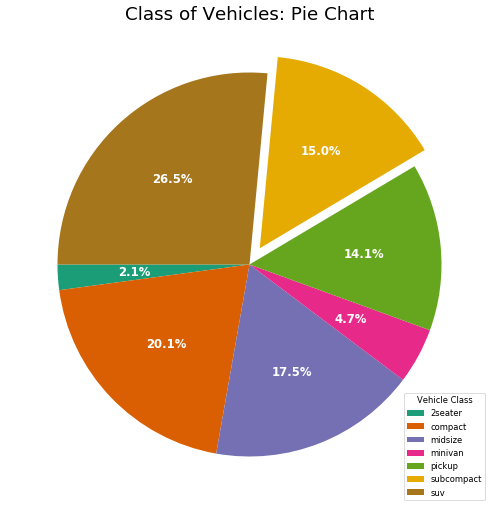

In [80]:
fig = plt.figure(figsize=(8,8),dpi=60)
ax = fig.add_axes((0,0,1,1))

explode = [0,0,0,0,0,0.1,0]
# 在这里匿名函数，接收的x为百分比（小数）
_,_,texts = ax.pie(df.counts, 
                   autopct=lambda x: f'{round(x,1)}%',
                  colors=plt.cm.Dark2.colors,
                  explode=explode,
                  startangle=180)

for text in texts:
    text.set(color='w',fontsize=14,fontweight=760)

# set legend
ax.legend(df['class'],title='Vehicle Class')

# set title
ax.set_title("Class of Vehicles: Pie Chart",fontsize=22)
plt.show()

# 树形图

In [81]:
import squarify

In [82]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [83]:
df = df_raw.groupby('class').size().reset_index(name='counts')

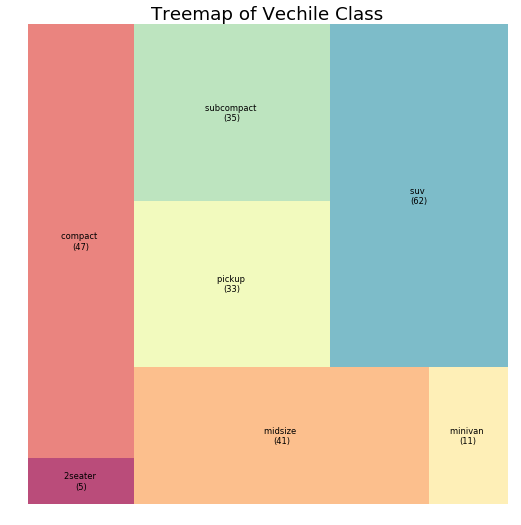

In [89]:
fig = plt.figure(figsize=(8,8),dpi=60)
ax = fig.add_axes((0,0,1,1))

# draw treemap
squarify.plot(sizes=df.counts, 
             label = df.apply(lambda x: f"{x[0]} \n({x[1]})",axis=1),
             color = [plt.cm.Spectral(i/float(df.shape[0])) 
                      for i in range(df.shape[0])],
            alpha = .7
              
             )

# set title
ax.set_title("Treemap of Vechile Class", fontsize=22)

# lighten border
plt.axis("off")
plt.show()

# 条形图

In [97]:
import random

In [90]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [94]:
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')

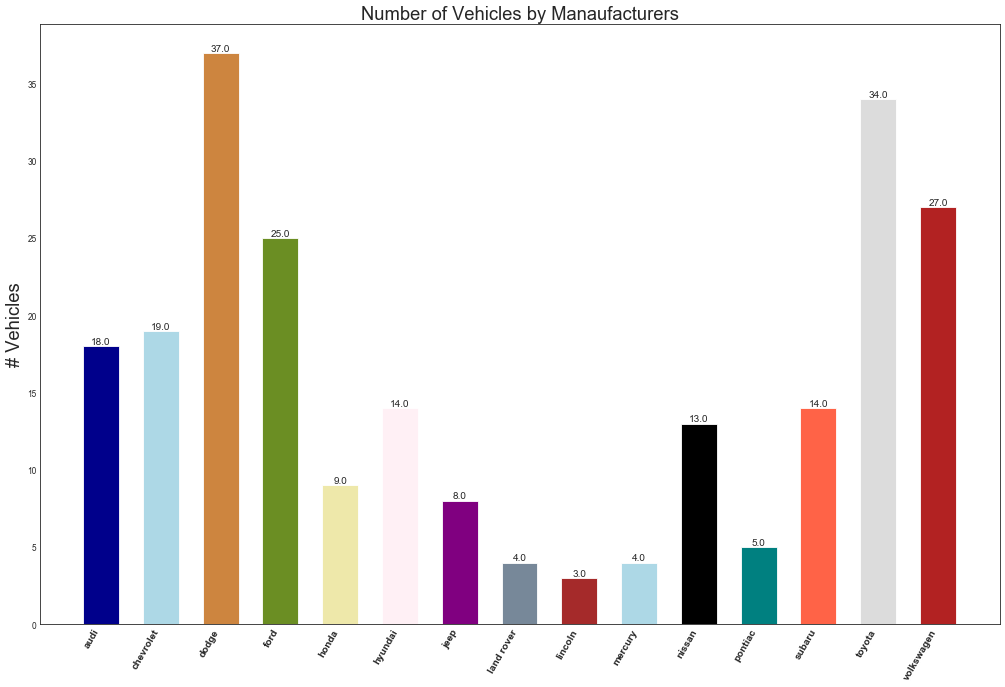

In [144]:
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

fig = plt.figure(figsize=(16,10),dpi=60)
ax = fig.add_axes((0,0,1,1))

# get color list
random.seed(100)
n = len(df.manufacturer.unique())
colors = random.choices(list(plt.cm.colors.cnames.keys()), k=n)

# draw bar
ax.bar(x=df.index, height=df.counts, 
       color=colors,
      width = 0.6)

# add text
for x,y in zip(df.index,df.counts):
    ax.text(x,y,s=round(float(y),1),
           ha='center',va='bottom',
           fontsize=12)

# set tick
ax.xaxis.set_ticks(df.index)
ax.xaxis.set_ticklabels(df.manufacturer.tolist(),
                        fontsize=12,fontweight='semibold',
                        rotation=60,ha='right')


# set title
ax.set_title("Number of Vehicles by Manaufacturers", fontsize=22)

# set ylabel
ax.set_ylabel('# Vehicles',fontsize=22)
plt.show()